# Proyecto Inteligencia Computacional 

In [1]:
import pandas as pd 
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

feats = pd.read_parquet('./data/features.parquet') 
lcs = pd.read_parquet('./data/lcs.parquet') 
oids = pd.read_parquet('./data/oids.parquet')

In [19]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)


#### Reemplazo de NaN por la Media de la característica correspondiente

In [7]:
from sklearn.impute import SimpleImputer

# Seleccionamos sólo columnas numéricas
numerical_cols = df_feats_class.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')    
imputed_numerical_data = imputer.fit_transform(df_feats_class[numerical_cols])
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_cols)

# Columnas no numéricas
categorical_cols = df_feats_class.select_dtypes(exclude=['float64', 'int64']).columns
# Combinar columnas
imputed_df_feats_class = pd.concat([df_feats_class[categorical_cols].reset_index(drop=True), imputed_numerical_df], axis=1)    # DF SIN VALORES NaN!
imputed_df_feats_class

,oid,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,ZTF17aaaaafz,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.00000,0.002542,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.000000,0.112910,2.703024e-01
1,ZTF17aaaaajg,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.00000,0.000132,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.000000,0.027691,9.082992e-03
2,ZTF17aaaaavq,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.00000,0.009013,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.000000,0.180732,1.054833e-01
3,ZTF17aaaacth,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.00000,0.000773,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.000000,0.145533,2.831434e-02
4,ZTF17aaaadmx,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.00000,0.004826,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.000000,0.172507,9.711672e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,ZTF21abblixa,CEP,0.386163,0.168959,0.047430,0.281581,0.253389,0.814502,0.99308,0.000478,...,20.019199,19.309700,0.926920,1243.084857,15.423586,15.427888,14.980499,175.867977,0.043515,3.447564e+08
8415,ZTF21abbvvji,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.00000,0.000000,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.000000,0.024969,3.964182e+00
8416,ZTF21abbzxoh,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.00000,0.000203,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.000000,0.024223,2.072808e+00
8417,ZTF21abcgftb,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.00000,0.000217,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.000000,0.034678,2.242692e-02


## Versión Actual

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# DataFrame con todas las features de cada objeto + la clase a la que pertenecen
df_feats_class = pd.merge(oids, feats, how="inner", on="oid", sort=True)
df_feats_for_forest = df_feats_class[df_feats_class.columns[1:]]
arr_class = df_feats_for_forest[df_feats_for_forest.columns[0]].values
df_feats_for_forest

,alerceclass,Q31_r,Rcs_r,Skew_r,SmallKurtosis_r,Std_r,StetsonK_r,Pvar_r,ExcessVar_r,PairSlopeTrend_r,...,max_diffmaglim_after_fid_g,median_diffmaglim_after_fid_g,delta_mag_fid_r,delta_mjd_fid_r,first_mag_r,mean_mag_r,min_mag_r,n_det_r,PercentAmplitude_r,Harmonics_mag_5_r
0,LPV,1.464396,0.215017,-0.173195,-0.741959,0.976239,0.900859,1.0,0.002542,0.033333,...,20.823200,19.508801,4.200617,1339.718634,17.564814,18.677803,16.661703,628.0,0.112910,0.270302
1,RRL,0.366083,0.104706,0.405444,-1.552645,0.192603,0.883649,1.0,0.000132,-0.100000,...,21.066299,20.175400,0.580561,1251.693287,16.485819,16.641393,16.403305,320.0,0.027691,0.009083
2,LPV,2.839326,0.314243,0.001261,-1.538020,1.494441,0.800329,1.0,0.009013,0.300000,...,21.126600,20.008301,5.057098,1434.977350,16.880259,15.694755,13.155277,656.0,0.180732,0.105483
3,EB,0.029942,0.087856,2.875995,8.698949,0.476514,0.543303,1.0,0.000773,0.033333,...,20.865801,19.922400,2.519390,1189.854849,16.813747,17.039993,16.799618,93.0,0.145533,0.028314
4,LPV,1.512813,0.298351,-0.484697,-0.732266,1.037921,0.791008,1.0,0.004826,-0.233333,...,20.916500,19.762699,5.000990,1338.672627,13.901798,14.856612,12.674696,479.0,0.172507,0.097117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8414,CEP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.019199,19.309700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8415,RRL,0.389800,0.259549,0.506888,-1.274300,0.202627,0.925235,1.0,0.000000,0.033333,...,20.693900,20.560050,0.483679,28.936458,16.840920,17.002280,16.805649,8.0,0.024969,3.964182
8416,DSCT,0.457832,0.359654,0.324823,-1.448713,0.219106,0.893713,1.0,0.000203,-0.100000,...,20.815800,20.049101,0.595043,353.070185,15.650616,15.353477,15.068784,24.0,0.024223,2.072808
8417,RRL,0.347692,0.136953,0.130523,-0.614194,0.192589,0.830999,1.0,0.000217,0.100000,...,20.883900,20.081400,0.794328,375.932407,13.234352,13.045922,12.675948,24.0,0.034678,0.022427


In [6]:
# Suponiendo que 'feats' es tu DataFrame y 'target' es la columna de etiquetas
X_forest = df_feats_for_forest.drop(columns=['alerceclass'])  # Reemplaza 'target' con el nombre de tu columna de etiquetas
y_forest = df_feats_for_forest['alerceclass']  # Reemplaza 'target' con el nombre de tu columna de etiquetas

# Entrenar el modelo RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, 
                            criterion="gini",
                            max_features="sqrt",
                            bootstrap=True,
                            max_samples=2/3,
                            oob_score=True,
                            random_state=42
                            ,class_weight="balanced")
clf.fit(X_forest, y_forest)

# Obtener la importancia de las características
feature_importances = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Feature': X_forest.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df


,Feature,Importance
115,Multiband_period_g_r,0.077157
117,Period_band_g,0.061812
119,Period_band_r,0.056347
48,g-r_mean_g_r,0.033195
49,g-r_max_corr_g_r,0.031238
...,...,...
27,SPM_tau_rise_r,0.000592
56,MHPS_PN_flag_g,0.000365
76,Pvar_g,0.000180
6,Pvar_r,0.000152


# Upsampleo de clases

In [13]:
from sklearn.utils import resample
from sklearn.utils import shuffle

# Supongamos que df_feats_for_forest es tu DataFrame y 'alerceclass' es la columna de clases
class_counts = df_feats_for_forest['alerceclass'].value_counts()
max_class_count = class_counts.max()

# Crear un nuevo DataFrame vacío para los datos sobremuestreados
df_upsampled = pd.DataFrame()

for class_label in class_counts.index:
    df_class = df_feats_for_forest[df_feats_for_forest['alerceclass'] == class_label]
    # Sobremuestreo
    df_class_upsampled = resample(df_class, 
                                  replace=True,  # Muestreo con reemplazo
                                  n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                  random_state=42)
    df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)

# Mezclar los datos para evitar cualquier orden residual
df_upsampled = shuffle(df_upsampled, random_state=42)
df_upsampled
df_upsampled['alerceclass'].value_counts()

alerceclass
CEP     2689
DSCT    2689
LPV     2689
EB      2689
RRL     2689
Name: count, dtype: int64

In [14]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(100)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_upsampled[importance_arr]
df_feats_for_auto

,Period_band_g,Multiband_period_g_r,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_max_g_r,g-r_mean_corr_g_r,GP_DRW_tau_g,Autocor_length_r,...,Harmonics_mag_1_r,MedianAbsDev_r,Harmonics_phase_3_g,Psi_CS_r,Beyond1Std_r,sgscore1,SPM_chi_g,Meanvariance_r,delta_mjd_fid_g,MHPS_low_g
830,0.595369,0.595369,0.595369,0.196394,0.386225,2.325885,0.092970,0.581688,0.306396,1.0,...,0.201877,0.110612,4.147487,0.292068,0.422131,0.982929,86.200571,0.013231,1389.053345,0.357697
7842,0.131250,0.131250,0.131250,0.353990,0.316222,NaN,-0.237152,0.480149,0.068272,1.0,...,20753.920506,0.044712,4.311353,0.417353,0.235294,0.843500,234.968346,0.011791,1132.915150,0.403663
2538,0.997951,0.997951,0.499500,1.807448,1.879362,9.406768,1.474511,2.047141,196.185887,42.0,...,0.160375,0.122696,0.649412,0.248148,0.436508,1.000000,80.648103,0.014381,1473.006447,0.765489
136,246.753248,246.753248,246.753248,1.713871,1.345716,9.793159,1.314535,1.740632,716.416690,20.0,...,2.174813,0.957532,3.700069,0.243928,0.423221,0.500000,29215.004927,0.084965,1439.040833,32.561378
6594,0.711770,0.711770,0.711770,0.342292,0.098091,1.317976,0.104615,-0.022948,0.276249,1.0,...,0.391638,0.111017,0.501424,0.456087,0.384615,1.000000,889.600757,0.024440,1256.790949,0.392452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,0.501889,0.501889,0.501889,-0.398334,-0.262184,0.858356,-0.610697,0.178446,0.810944,8.0,...,0.338399,0.081285,4.632779,0.270117,0.393728,1.000000,66.922035,0.018750,1436.067905,5.512213
2967,0.119456,0.119456,NaN,NaN,NaN,1.761375,NaN,NaN,2.203885,NaN,...,NaN,NaN,3.320266,NaN,NaN,0.500000,832.349747,NaN,1382.015139,0.069190
4865,1.033845,1.033845,NaN,NaN,NaN,7.397063,NaN,NaN,0.014402,NaN,...,NaN,NaN,5.311938,NaN,NaN,0.500000,2537.097262,NaN,1241.297593,0.037510
185,0.197631,0.197631,0.197631,0.701314,0.679770,2.538471,0.663917,0.601101,0.135534,2.0,...,0.280875,0.255279,6.059648,0.302886,0.377016,0.993125,138.752427,0.016532,1352.120856,0.183674


# Reemplazo de Nan

In [15]:
from sklearn.impute import SimpleImputer

# Seleccionamos sólo columnas numéricas
numerical_cols = df_feats_for_auto.columns
imputer = SimpleImputer(strategy='most_frequent')    
imputed_numerical_data = imputer.fit_transform(df_feats_for_auto[numerical_cols])
imputed_numerical_df = pd.DataFrame(imputed_numerical_data, columns=numerical_cols)
imputed_numerical_df

,Period_band_g,Multiband_period_g_r,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_max_g_r,g-r_mean_corr_g_r,GP_DRW_tau_g,Autocor_length_r,...,Harmonics_mag_1_r,MedianAbsDev_r,Harmonics_phase_3_g,Psi_CS_r,Beyond1Std_r,sgscore1,SPM_chi_g,Meanvariance_r,delta_mjd_fid_g,MHPS_low_g
0,0.595369,0.595369,0.595369,0.196394,0.386225,2.325885,0.092970,0.581688,0.306396,1.0,...,0.201877,0.110612,4.147487,0.292068,0.422131,0.982929,86.200571,0.013231,1389.053345,0.357697
1,0.131250,0.131250,0.131250,0.353990,0.316222,0.973805,-0.237152,0.480149,0.068272,1.0,...,20753.920506,0.044712,4.311353,0.417353,0.235294,0.843500,234.968346,0.011791,1132.915150,0.403663
2,0.997951,0.997951,0.499500,1.807448,1.879362,9.406768,1.474511,2.047141,196.185887,42.0,...,0.160375,0.122696,0.649412,0.248148,0.436508,1.000000,80.648103,0.014381,1473.006447,0.765489
3,246.753248,246.753248,246.753248,1.713871,1.345716,9.793159,1.314535,1.740632,716.416690,20.0,...,2.174813,0.957532,3.700069,0.243928,0.423221,0.500000,29215.004927,0.084965,1439.040833,32.561378
4,0.711770,0.711770,0.711770,0.342292,0.098091,1.317976,0.104615,-0.022948,0.276249,1.0,...,0.391638,0.111017,0.501424,0.456087,0.384615,1.000000,889.600757,0.024440,1256.790949,0.392452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,0.501889,0.501889,0.501889,-0.398334,-0.262184,0.858356,-0.610697,0.178446,0.810944,8.0,...,0.338399,0.081285,4.632779,0.270117,0.393728,1.000000,66.922035,0.018750,1436.067905,5.512213
13441,0.119456,0.119456,999.999953,-0.260430,-0.185009,1.761375,-0.310000,-0.031787,2.203885,1.0,...,0.177309,0.027106,3.320266,0.500000,0.333333,0.500000,832.349747,0.003570,1382.015139,0.069190
13442,1.033845,1.033845,999.999953,-0.260430,-0.185009,7.397063,-0.310000,-0.031787,0.014402,1.0,...,0.177309,0.027106,5.311938,0.500000,0.333333,0.500000,2537.097262,0.003570,1241.297593,0.037510
13443,0.197631,0.197631,0.197631,0.701314,0.679770,2.538471,0.663917,0.601101,0.135534,2.0,...,0.280875,0.255279,6.059648,0.302886,0.377016,0.993125,138.752427,0.016532,1352.120856,0.183674


In [16]:
# Normalización datos
cols = imputed_numerical_df.columns
scaled_numerical_data = StandardScaler().fit_transform(imputed_numerical_df)
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=cols)
scaled_numerical_df.insert(0, "alerceclass", df_upsampled['alerceclass'].values)
scaled_numerical_df

,alerceclass,Period_band_g,Multiband_period_g_r,Period_band_r,g-r_mean_g_r,g-r_max_corr_g_r,g-W2,g-r_max_g_r,g-r_mean_corr_g_r,GP_DRW_tau_g,...,Harmonics_mag_1_r,MedianAbsDev_r,Harmonics_phase_3_g,Psi_CS_r,Beyond1Std_r,sgscore1,SPM_chi_g,Meanvariance_r,delta_mjd_fid_g,MHPS_low_g
0,CEP,-0.375201,-0.326095,-0.440782,-0.411294,-0.287998,-0.350728,-0.395601,-0.215021,-0.010223,...,-0.019865,-0.098214,0.458131,-0.098021,0.638825,0.466090,-0.082119,-0.120795,0.625216,-0.181997
1,DSCT,-0.376873,-0.330686,-0.442224,-0.239294,-0.360049,-0.711577,-0.718541,-0.321585,-0.010223,...,-0.019865,-0.452219,0.542438,1.284624,-1.156186,-0.314169,-0.078357,-0.211306,0.015715,-0.177440
2,LPV,-0.373750,-0.322113,-0.441080,1.347005,1.248833,1.539050,0.955884,1.322964,-0.010223,...,-0.019865,-0.033298,-1.341588,-0.582731,0.776949,0.561621,-0.082260,-0.048512,0.824989,-0.141574
3,LPV,0.512025,2.108931,0.324178,1.244875,0.699571,1.642172,0.799388,1.001285,-0.010222,...,-0.019865,4.451327,0.227940,-0.629302,0.649296,-2.236431,0.654538,4.387382,0.744165,3.010185
4,EB,-0.374781,-0.324944,-0.440420,-0.252062,-0.584564,-0.619723,-0.384209,-0.849582,-0.010223,...,-0.019865,-0.096036,-1.417726,1.712094,0.278398,0.561621,-0.061802,0.583649,0.310487,-0.178552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13440,RRL,-0.375538,-0.327020,-0.441072,-1.060379,-0.955382,-0.742389,-1.083959,-0.638220,-0.010223,...,-0.019865,-0.255751,0.707808,-0.340281,0.365948,0.561621,-0.082607,0.226053,0.737091,0.328944
13441,DSCT,-0.376916,-0.330803,2.664966,-0.909871,-0.875948,-0.501387,-0.789804,-0.858859,-0.010223,...,-0.019865,-0.546795,0.032535,2.196721,-0.214287,-2.236431,-0.063249,-0.727972,0.608468,-0.210595
13442,LPV,-0.373620,-0.321758,2.664966,-0.909871,-0.875948,1.002691,-0.789804,-0.858859,-0.010223,...,-0.019865,-0.546795,1.057227,2.196721,-0.214287,-2.236431,-0.020137,-0.727972,0.273619,-0.213735
13443,EB,-0.376634,-0.330030,-0.442018,0.139774,0.014136,-0.293992,0.162924,-0.194647,-0.010223,...,-0.019865,0.678916,1.441916,0.021359,0.205389,0.523148,-0.080790,0.086640,0.537332,-0.199247


In [84]:
X = scaled_numerical_df.drop(columns=['alerceclass']) 
y = scaled_numerical_df['alerceclass'] 

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Act MTP2

In [31]:
importance_df_ = importance_df[importance_df.columns[:-1]].head(100)
importance_arr = importance_df_["Feature"].values

df_feats_for_auto = df_feats_for_forest[importance_arr]
df_feats_for_auto.insert(0, "alerceclass", df_feats_for_forest['alerceclass'].values)
df_feats_for_auto['alerceclass'].value_counts()


alerceclass
EB      2689
RRL     2652
LPV     1374
CEP     1172
DSCT     532
Name: count, dtype: int64

In [35]:
# Extraer 50 filas de df_feats_for_auto para cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
#Primero definimos un conjunto test balanceado con 50 elementos de cada clase
X_test = df_test.drop(columns=['alerceclass'])
y_test = df_test['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto=pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)


#df_test
df_auto['alerceclass'].value_counts()
#df_test['alerceclass'].value_counts()


C:\Users\icali\AppData\Local\Temp\ipykernel_7556\1582086587.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)


alerceclass
EB      2629
RRL     2592
LPV     1314
CEP     1112
DSCT     472
Name: count, dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle

#Primero definimos un conjunto test balanceado con 50 elementos de cada clase
df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
X_test = df_test.drop(columns=['alerceclass'])
y_test = df_test['alerceclass']

# Eliminar los elementos de df_test de df_feats_for_auto
df_auto = pd.concat([df_feats_for_auto,df_test]).drop_duplicates(keep=False)

df_val=df_auto.groupby('alerceclass').apply(lambda x: x.sample(n=100, random_state=42)).reset_index(drop=True)
X_val = df_val.drop(columns=['alerceclass'])
y_val = df_val['alerceclass']

df_train=pd.concat([df_auto,df_val]).drop_duplicates(keep=False)
X_train = df_auto.drop(columns=['alerceclass'])
y_train = df_auto['alerceclass']


#Imputar los NaN por el valor más frecuente en el conjunto de entrenamiento
imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_val = imputer.transform(X_val)
imputed_X_test = imputer.transform(X_test)

# Normalizar los datos usando las constantes del conjunto de entrenamiento
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(imputed_X_train)
X_val = scaler.transform(imputed_X_val)
X_test = scaler.transform(imputed_X_test)

#Función para realizar upsampling
def upsample_data(X, y):
    df = pd.concat([pd.DataFrame(X), y.reset_index(drop=True)], axis=1)
    class_counts = y.value_counts()
    max_class_count = class_counts.max()
    
    df_upsampled = pd.DataFrame()
    for class_label in class_counts.index:
        df_class = df[df['alerceclass'] == class_label]
        df_class_upsampled = resample(df_class, 
                                      replace=True,  # Muestreo con reemplazo
                                      n_samples=max_class_count,  # Número de muestras igual a la clase mayoritaria
                                      random_state=42)
        df_upsampled = pd.concat([df_upsampled, df_class_upsampled], axis=0)
    
    df_upsampled = shuffle(df_upsampled, random_state=42)
    return df_upsampled.drop(columns=['alerceclass']).values, df_upsampled['alerceclass']

# Realizar upsampling en el conjunto de entrenamiento
X_train, y_train = upsample_data(scaled_X_train, y_train)


# Mostrar los resultados
print("Distribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("\nDistribución de clases en el conjunto de validación:")
print(y_val.value_counts())
print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts())


C:\Users\icali\AppData\Local\Temp\ipykernel_7556\1911761858.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df_feats_for_auto.groupby('alerceclass').apply(lambda x: x.sample(n=60, random_state=42)).reset_index(drop=True)
C:\Users\icali\AppData\Local\Temp\ipykernel_7556\1911761858.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_val=df_auto.groupby('alerceclass').apply(lambda x: x.sample

Distribución de clases en el conjunto de entrenamiento:
alerceclass
LPV     2629
CEP     2629
EB      2629
RRL     2629
DSCT    2629
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
alerceclass
CEP     100
DSCT    100
EB      100
LPV     100
RRL     100
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
alerceclass
CEP     60
DSCT    60
EB      60
LPV     60
RRL     60
Name: count, dtype: int64


In [70]:
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.optimizers import Adam , Nadam
from keras.optimizers import RMSprop
from keras.layers import Dropout
from torch import nn

dim_entrada = X_train.shape[1]

capa_input = Input(shape=(dim_entrada,))

#CAPAS AUTOENCODER
encoder = Dense(dim_entrada, activation="selu")(capa_input)   
encoder = Dense(60, activation="selu")(encoder)
encoder = Dense(40, activation="selu")(encoder)

encoder = Dense(30, activation="selu")(encoder)  #CUELLO DE BOTELLA

decoder = Dense(40, activation="selu")(encoder)
decoder = Dense(60, activation="selu")(decoder)
decoder = Dense(dim_entrada, activation="selu")(decoder)

#MODELOS
autoencoder = Model(inputs=capa_input, outputs=decoder)
encoder_model = Model(inputs=capa_input, outputs=encoder)


autoencoder.compile(
    loss="mse",
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    )

# Extraer los valores de accuracy y loss del historial de entrenamiento
history = autoencoder.fit(
    X_train, 
    X_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, X_val),
    callbacks=[EarlyStopping(patience=10)]
)



Epoch 1/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6336 - val_loss: 0.4160
Epoch 2/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2909 - val_loss: 0.3545
Epoch 3/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2263 - val_loss: 0.3215
Epoch 4/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2055 - val_loss: 0.3028
Epoch 5/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1828 - val_loss: 0.2999
Epoch 6/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2005 - val_loss: 0.2873
Epoch 7/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1825 - val_loss: 0.2687
Epoch 8/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1993 - val_loss: 0.2637
Epoch 9/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1610 - val_loss: 0.2539
Epoch 10/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1679 - val_loss: 0.2371
Epoch 11/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1786 - val_loss: 0.2409
Epoch 12/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Test MSE:  0.22002481584337033


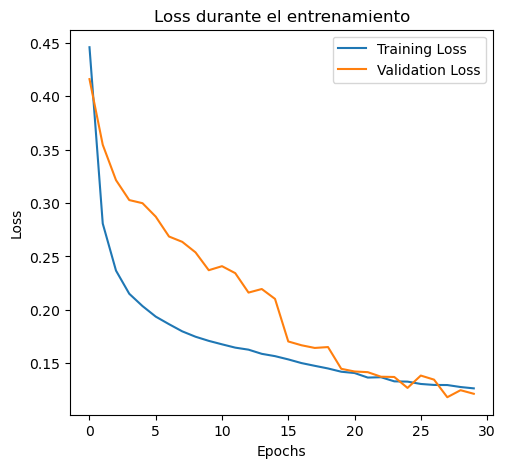

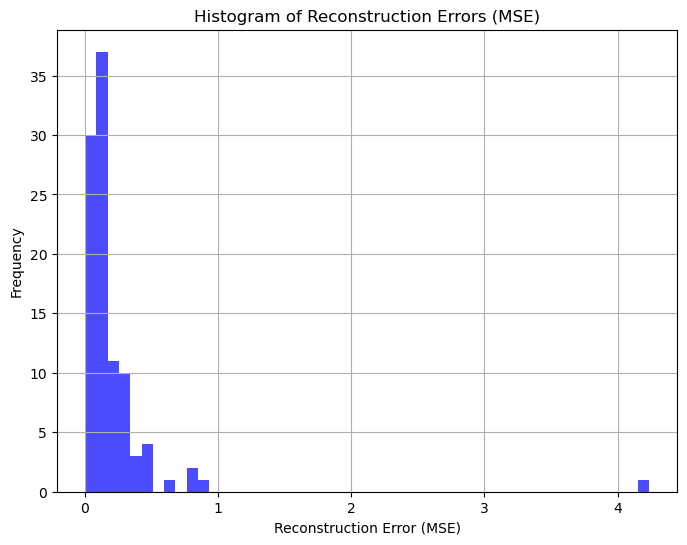

In [71]:
# Calcular el error de reconstrucción
from sklearn.metrics import mean_squared_error, mean_absolute_error
reconstructed_X_test = autoencoder.predict(X_test)


test_mse = np.mean(np.square(X_test - reconstructed_X_test), axis=1)


print("Test MSE: ", np.mean(test_mse))


# Graficar los valores de loss
plt.figure(figsize=(12, 5))

# Graficar el loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse_per_sample = mean_squared_error(X_test, reconstructed_X_test, multioutput='raw_values')

plt.figure(figsize=(8, 6))
plt.hist(mse_per_sample, bins=50, alpha=0.7, color='b', label='MSE')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors (MSE)')
plt.grid(True)
plt.show()

In [102]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_distances

# Obtener el vector de embedding del autoencoder
encoded_X_train = encoder_model.predict(X_train)
encoded_X_val = encoder_model.predict(X_val)

# Convertir las etiquetas a valores numéricos
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# Convertir las etiquetas a one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded)
y_val_one_hot = to_categorical(y_val_encoded)

# Definir la red de estimación
input_layer = Input(shape=(encoded_X_train.shape[1],))
hidden_layer = Dense(128, activation='tanh')(input_layer)
#dropout_layer = Dropout(0.2)(hidden_layer)
output_layer = Dense(y_train_one_hot.shape[1], activation='softmax')(hidden_layer)

model_estimation = Model(inputs=input_layer, outputs=output_layer)
model_estimation.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar la red de estimación
history_estimation = model_estimation.fit(encoded_X_train, 
                                          y_train_one_hot, 
                                          epochs=30,
                                          batch_size=32,
                                          validation_data=(encoded_X_val, y_val_one_hot),
                                          callbacks=[EarlyStopping(patience=10)])

# Obtener las predicciones de la red de estimación formato softmax
output_estimation_train = model_estimation.predict(encoded_X_train)
output_estimation_val = model_estimation.predict(encoded_X_val)

# # Concatenar las predicciones con las entradas originales para el GMM
# gmm_input_train = np.concatenate([encoded_X_train, output_estimation_train], axis=1)
# gmm_input_val = np.concatenate([encoded_X_val, output_estimation_val], axis=1)

# Concatenar las predicciones con las entradas originales para el GMM
gmm_input_train = np.concatenate([output_estimation_train], axis=1)
gmm_input_val = np.concatenate([output_estimation_val], axis=1)

# Definir y entrenar el modelo GMM
gmm = GaussianMixture(n_components=len(np.unique(y_train)), random_state=42)
gmm.fit(gmm_input_train)

# Predecir las etiquetas del conjunto de prueba usando GMM
gmm_labels = gmm.predict(gmm_input_val)
# Evaluar las clasificaciones del modelo GMM
# Convertir las etiquetas predichas por GMM a las etiquetas originales
gmm_labels_original = le.inverse_transform(gmm_labels)

accuracy = accuracy_score(y_val, gmm_labels_original)
report = classification_report(y_val, gmm_labels_original, target_names=le.classes_)

print("Accuracy del modelo GMM: ", accuracy)
print("Reporte de clasificación del modelo GMM:\n", report)


411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Epoch 1/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6497 - loss: 0.9241 - val_accuracy: 0.7960 - val_loss: 0.6126
Epoch 2/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7875 - loss: 0.5675 - val_accuracy: 0.8060 - val_loss: 0.5481
Epoch 3/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8108 - loss: 0.5160 - val_accuracy: 0.8180 - val_loss: 0.5070
Epoch 4/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8250 - loss: 0.4813 - val_accuracy: 0.8320 - val_loss: 0.4851
Epoch 5/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8306 - loss: 0.4615 - val_accuracy: 0.8380 - val_loss: 0.4624
Epoch 6/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8501 - loss: 0.4246 - val_accuracy: 0.8380 - val_loss: 0.4558
Epoch 7/30
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8581 - loss: 0.4086 - val_accuracy: 0.8380 - val_loss: 0.4514
Epoch 8/30
411/411 ━━━━━

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


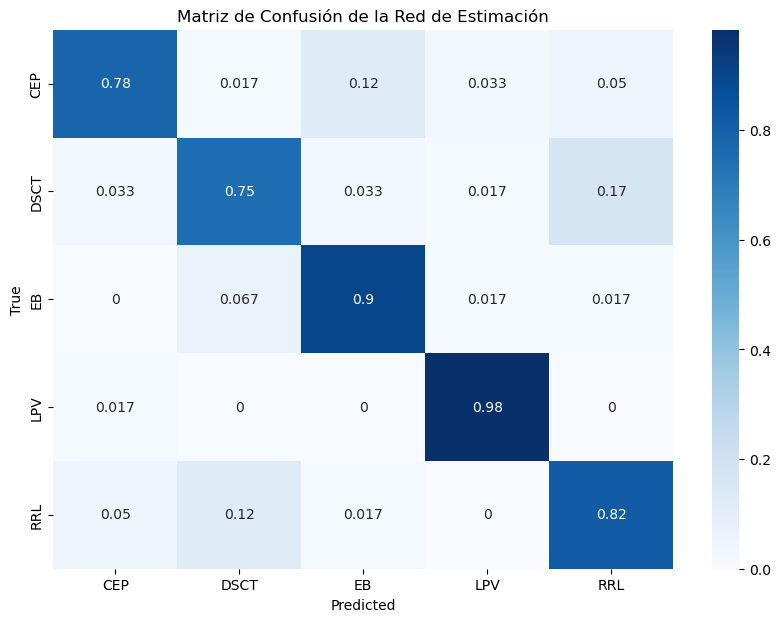

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Predecir las etiquetas del conjunto de prueba
y_pred = model_estimation.predict(encoder_model.predict(X_test))
y_pred_labels = np.argmax(y_pred, axis=1)

y_test_encoded = le.transform(y_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test_encoded, y_pred_labels, normalize='true')

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión de la Red de Estimación')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


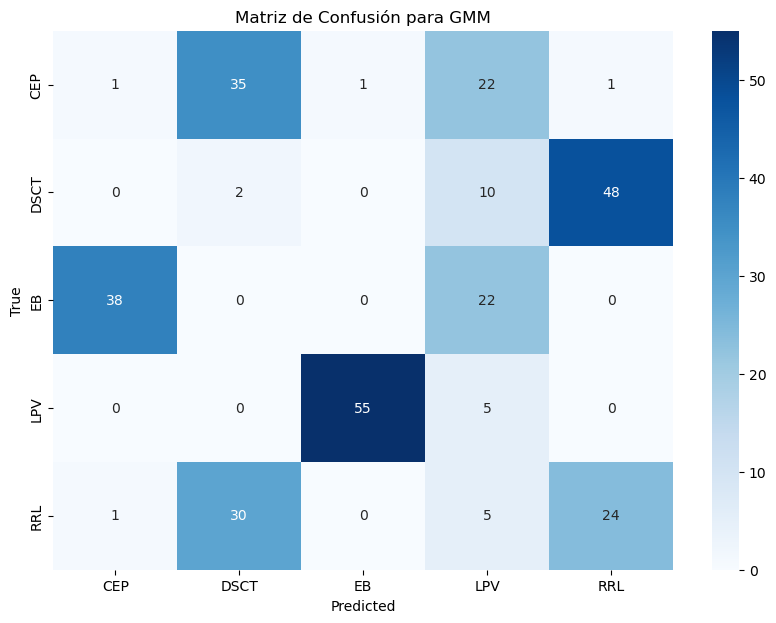

In [106]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones de GMM para los datos de prueba
encoded_X_test = encoder_model.predict(X_test)
output_estimation_test = model_estimation.predict(encoded_X_test)
gmm_labels_test = gmm.predict(output_estimation_test)

# Convertir las etiquetas predichas por GMM a las etiquetas originales
gmm_labels_testt = le.inverse_transform(gmm_labels_test)

if isinstance(y_test_encoded[0], str):
    y_test_encoded = le.transform(y_test_encoded)
elif isinstance(gmm_labels_testt[0], str):
    gmm_labels_testt = le.transform(gmm_labels_testt)

# Crear la matriz de confusión para las etiquetas reproducidas por el modelo GMM
conf_matrix_gmm = confusion_matrix(y_test_encoded, gmm_labels_testt)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_gmm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión para GMM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


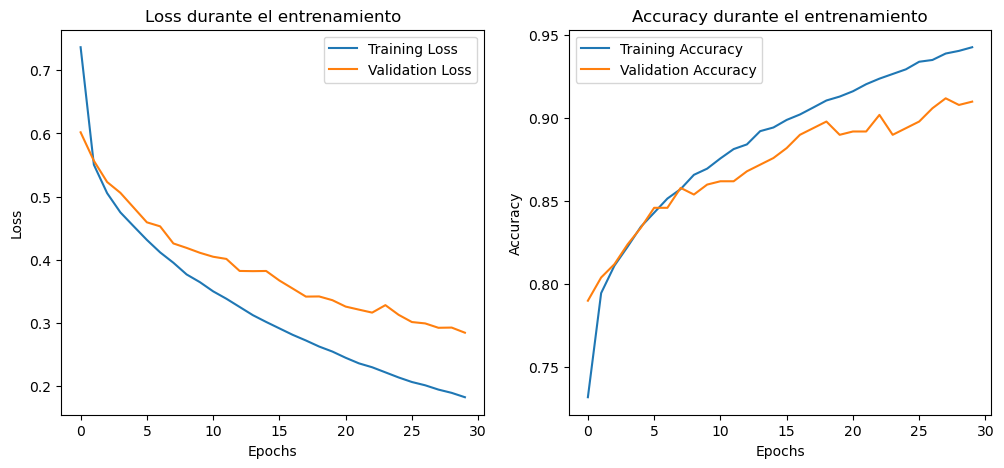

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Graficar los valores de loss y accuracy
plt.figure(figsize=(12, 5))

# Graficar el loss
plt.subplot(1, 2, 1)
plt.plot(history_estimation.history['loss'], label='Training Loss')
plt.plot(history_estimation.history['val_loss'], label='Validation Loss')
plt.title('Loss durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar la accuracy
plt.subplot(1, 2, 2)
plt.plot(history_estimation.history['accuracy'], label='Training Accuracy')
plt.plot(history_estimation.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


c:\anaconda3\envs\inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


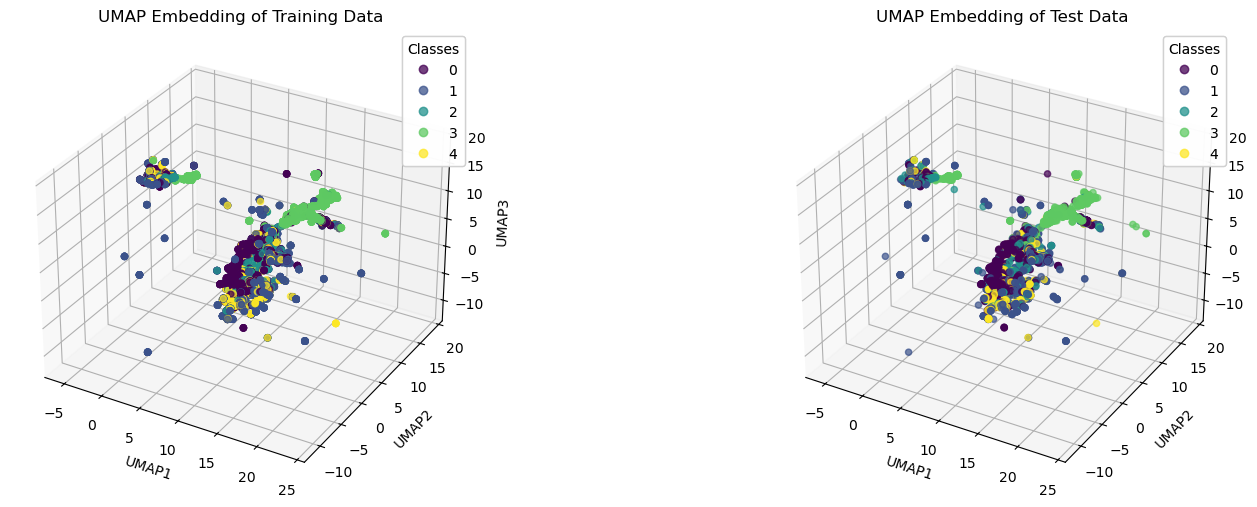

In [90]:
import umap
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Obtener el vector de salida del encoder para los datos de entrenamiento y prueba
encoded_X_train = encoder_model.predict(X_train)
encoded_X_test = encoder_model.predict(X_test)

# Aplicar UMAP para reducir la dimensionalidad a 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embedding_train = reducer.fit_transform(encoded_X_train)
embedding_test = reducer.transform(encoded_X_test)

# Crear un codificador de etiquetas
le = LabelEncoder()

# Codificar las clases de entrenamiento y prueba
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Crear un DataFrame para facilitar la visualización
embedding_df_train = pd.DataFrame(embedding_train, columns=['UMAP1', 'UMAP2', 'UMAP3'])
embedding_df_train['Class'] = y_train_encoded

embedding_df_test = pd.DataFrame(embedding_test, columns=['UMAP1', 'UMAP2', 'UMAP3'])
embedding_df_test['Class'] = y_test_encoded

# Visualizar los datos en 3D
fig = plt.figure(figsize=(18, 6))

# Visualización de los datos de entrenamiento
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter(embedding_df_train['UMAP1'], embedding_df_train['UMAP2'], embedding_df_train['UMAP3'], 
                     c=embedding_df_train['Class'], cmap='viridis', alpha=0.7)
ax.set_title('UMAP Embedding of Training Data')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Visualización de los datos de prueba
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter(embedding_df_test['UMAP1'], embedding_df_test['UMAP2'], embedding_df_test['UMAP3'], 
                     c=embedding_df_test['Class'], cmap='viridis', alpha=0.7)
ax.set_title('UMAP Embedding of Test Data')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')
legend2 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend2)

plt.show()

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


c:\anaconda3\envs\inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


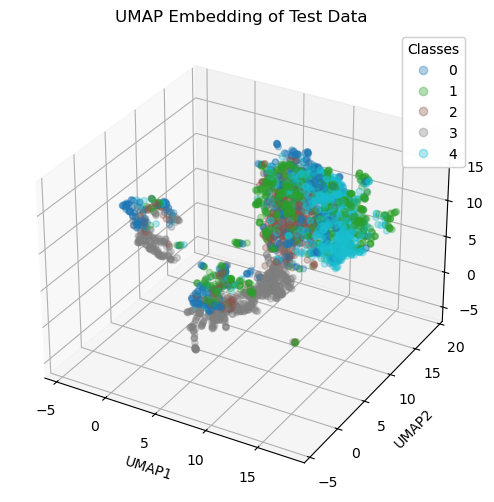

In [137]:
import umap
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
# Obtener el vector de embedding del autoencoder
encoded_X_test = encoder_model.predict(X_test)

# Aplicar UMAP para reducir la dimensionalidad a 2D
reducer = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.7, 
                    metric='euclidean', random_state=42,
                    n_epochs=500, spread=1.5, learning_rate=0.5)
umap_embeddings_test = reducer.fit_transform(encoded_X_test)

# Convertir las etiquetas de clase a valores numéricos
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)

embedding_df_test = pd.DataFrame({
    'umap_x': umap_embeddings_test[:, 0],
    'umap_y': umap_embeddings_test[:, 1],
    'umap_z': umap_embeddings_test[:, 2],
    'alerceclass': y_test_numeric
})

# Visualizar los datos en 3D
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Visualización de los datos de prueba
scatter = ax.scatter(embedding_df_test['umap_x'], embedding_df_test['umap_y'], embedding_df_test['umap_z'], 
                     c=embedding_df_test['alerceclass'], cmap='tab10', alpha=0.3)
ax.set_title('UMAP Embedding of Test Data')
ax.set_xlabel('UMAP1')
ax.set_ylabel('UMAP2')
ax.set_zlabel('UMAP3')

# Añadir leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\anaconda3\envs\inteligencia\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


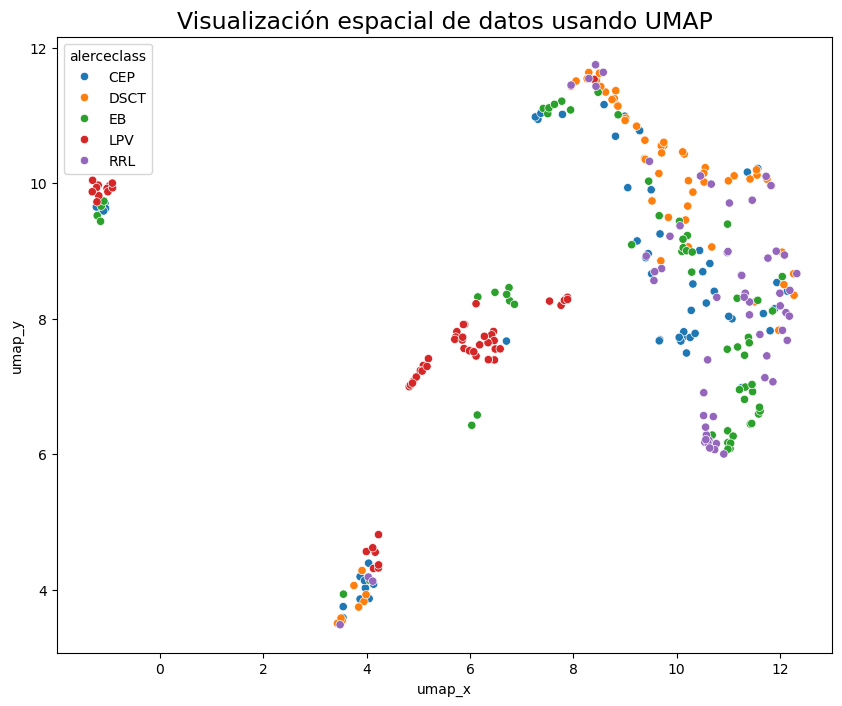

In [99]:
import umap
# Obtener el vector de embedding del autoencoder
encoded_X_test = encoder_model.predict(X_test)

reducer = umap.UMAP(n_neighbors=12, min_dist=0.0, metric='cosine', 
                    learning_rate= 1 ,n_epochs=300, random_state=42
                    ,spread=1)

# Normalizar los datos antes de aplicar UMAP
scaler = StandardScaler()
encoded_X_test_scaled = scaler.fit_transform(encoded_X_test)

umap_embeddings = reducer.fit_transform(encoded_X_test_scaled)

embedding_df = pd.DataFrame({
    'alerceclass': y_test,   # clase
    'umap_x': umap_embeddings[:, 0],    # UMAP_1
    'umap_y': umap_embeddings[:, 1],    # UMAP_2
})

plt.figure(figsize=(10, 8))
sns.scatterplot(x='umap_x', y='umap_y', hue='alerceclass', data=embedding_df, palette='tab10') 
plt.title('Visualización espacial de datos usando UMAP', fontsize='17')
plt.show()